In [3]:
%matplotlib inline
import jax.numpy as jnp
from jax import value_and_grad
from jax import grad
from jax import random
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as snb
from scipy.stats import multivariate_normal
from jax.numpy import log

snb.set_theme(font_scale=1.25)

from scipy.special import gammaln

In [6]:
a0 = 1
b0 = 1/10
ys = jnp.array([7, 4, 8, 11, 12])

def logp(lam, a0, b0):
    gam = gammaln(a0)
    l = log(b0) * a0 - gam + log(lam) * (a0 - 1) - b0 * lam
    return l

def logpy(lam, a0, b0, ys):
    s = jnp.sum(ys)
    a = a0 + s
    b = b0 + len(ys)
    gam = gammaln(a)
    l = log(b) * a - gam + log(lam) * (a - 1) - b * lam
    return l

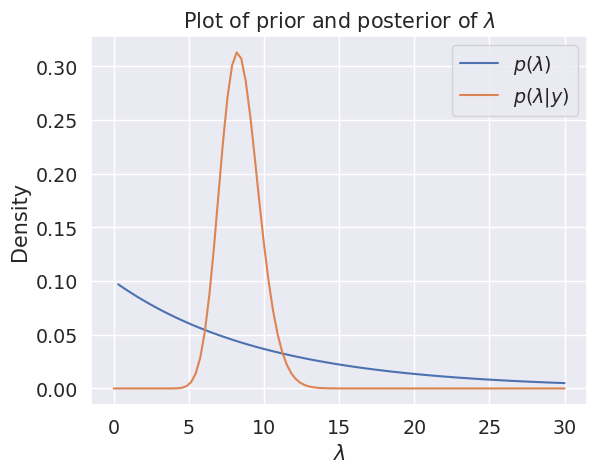

In [12]:
lams = jnp.linspace(0, 30, 100)
logps = logp(lams, a0, b0)
logpys = logpy(lams, a0, b0, ys)

plt.plot(lams, jnp.exp(logps), label = r'$p(\lambda)$')
plt.plot(lams, jnp.exp(logpys), label = r'$p(\lambda|y)$')
plt.title(r'Plot of prior and posterior of $\lambda$')
plt.xlabel(r'$\lambda$')
plt.ylabel('Density')
plt.legend()
plt.savefig('fig.png')

**Beta Binomial model**

/tmp/ipykernel_1011/2450705355.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(ks, arr, basefmt=" ", use_line_collection=True)


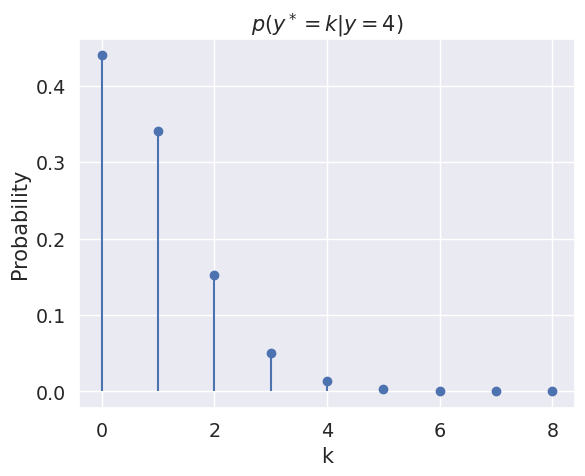

In [30]:
from scipy.special import beta, comb
a0 = 1
b0 = 1
N = 115
Nstar = 20
y = 4


def pystar(k, a0, b0, N, Nstar, y):
    alpha = a0 + y
    bet = N - y - b0
    return comb(Nstar, k) * beta(alpha + k, bet + Nstar - k) / beta(alpha, bet)

ks = jnp.linspace(0, 8, 9)
arr = jnp.array([pystar(k, a0, b0, N, Nstar, y) for k in ks])

plt.stem(ks, arr, basefmt=" ", use_line_collection=True)
plt.xlabel('k')
plt.ylabel('Probability')
plt.title(r'$p(y^* = k|y = 4)$')
plt.savefig('figp1.png')
plt.show()

In [41]:
ks = jnp.linspace(0, 30, 31)
arr = jnp.array([pystar(k, a0, b0, N, Nstar, y) for k in ks])

mean = jnp.sum(ks * arr)
var = jnp.sum(arr * (ks - mean)**2)
print(mean)
print(var)

0.86956525
0.9679943
